In [2]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

In [10]:
os.chdir("/Users/pranavtavildar/Desktop/Senior-Thesis/data")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
all_filenames = all_filenames[:12]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "ChevronOil2022.csv", index=False, encoding='utf-8-sig')
combined_csv["Text"] =combined_csv["Text"].map(str)

In [11]:
from transformers import pipeline

In [12]:
sentiment_classifier = pipeline('sentiment-analysis')

combined_csv = (combined_csv.assign(sentiment = lambda x: x['Text'].apply(lambda s: sentiment_classifier(s)))
.assign(
label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))))
combined_csv.head()

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceCla

,Date,Tweet ID,Text,Username,Likes,sentiment,label,score,Open,High,Low,Close,Adj Close,Volume
0,2022-06-01 23:59:03+00:00,1532149762392309761,@Chevron Don’t let gov tell you what to do as ...,RobertA15891551,3.0,"[{'label': 'NEGATIVE', 'score': 0.992789328098...",NEGATIVE,0.992789,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-06-01 23:44:08+00:00,1532146007219195904,@RepStefanik No they are the direct result of ...,keithlb,0.0,"[{'label': 'NEGATIVE', 'score': 0.990190863609...",NEGATIVE,0.990191,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-01 23:40:44+00:00,1532145150750867457,"@Jim_Jordan Tell Exon, Shell, Texaco, Chevron,...",atxsouthside04,0.0,"[{'label': 'NEGATIVE', 'score': 0.994984269142...",NEGATIVE,0.994984,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-06-01 23:36:52+00:00,1532144177374408709,"When Chevron's PAC is maxed out to you, don't ...",EvanMMinton,12.0,"[{'label': 'NEGATIVE', 'score': 0.996644496917...",NEGATIVE,0.996644,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-06-01 23:18:44+00:00,1532139614734934017,$BRK.A $BRK.B $BRK OIL GAS ENERGY BOOM \nWhile...,Icon00007,0.0,"[{'label': 'POSITIVE', 'score': 0.769509613513...",POSITIVE,0.769510,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
combined_csv.to_csv("../data/sentiment_scored_chevron.csv",encoding='utf-8', index=False)

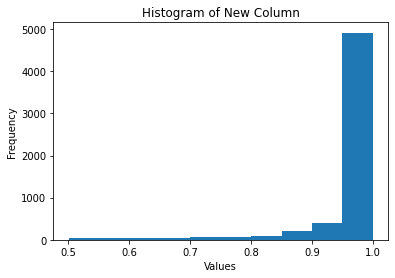

In [18]:
combined_csv["NumericalSentiment"] = combined_csv['score'] * combined_csv['sentiment'].apply(lambda x: -1 if x == 'NEGATIVE' else 1)

plt.hist(combined_csv['NumericalSentiment'], bins=10)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of New Column')
plt.show()

In [22]:
print(combined_csv['NumericalSentiment'].min())
print(combined_csv['NumericalSentiment'].max())
combined_csv.dtypes

0.5004849433898926
0.9998607635498047


Date                   object
Tweet ID               object
Text                   object
Username               object
Likes                 float64
sentiment              object
label                  object
score                 float64
Open                  float64
High                  float64
Low                   float64
Close                 float64
Adj Close             float64
Volume                float64
NumericalSentiment    float64
dtype: object

In [6]:
os.chdir("/Users/pranavtavildar/Desktop/Senior-Thesis/data")
df = pd.read_csv("CVX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,117.419998,119.690002,117.290001,119.260002,115.113411,10717700
1,2022-01-04,119.949997,121.980003,119.660004,121.430000,117.207954,16413100
2,2022-01-05,122.239998,123.839996,122.070000,122.220001,117.970497,15487100
3,2022-01-06,123.620003,124.320000,121.639999,123.260002,118.974327,13318500
4,2022-01-07,123.550003,125.540001,122.949997,125.029999,120.682785,14164600


In [7]:
df['return'] = np.log(df['Close']) - np.log(df['Close'].shift(1))
df.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date,Open,High,Low,Close,Adj Close,Volume,return
0,2022-01-03,117.419998,119.690002,117.290001,119.260002,115.113411,10717700,NaN
1,2022-01-04,119.949997,121.980003,119.660004,121.430000,117.207954,16413100,0.018032
2,2022-01-05,122.239998,123.839996,122.070000,122.220001,117.970497,15487100,0.006485
3,2022-01-06,123.620003,124.320000,121.639999,123.260002,118.974327,13318500,0.008473
4,2022-01-07,123.550003,125.540001,122.949997,125.029999,120.682785,14164600,0.014258


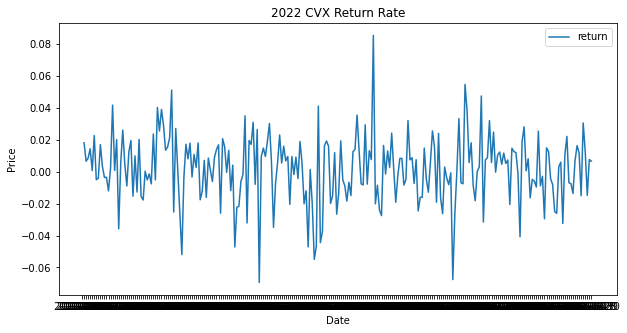

In [15]:
x = df['Date']
y = df['return']

fig, ax = plt.subplots(figsize=(10,5)) 
ax.plot(x, y, label='return')  
ax.set_xlabel('Date')  
ax.set_ylabel('Price')  
ax.set_title('2022 CVX Return Rate')  
ax.legend();  
plt.savefig('../figures/fig3.pdf')
df.to_csv("returns.csv")

IndexError: list index out of range